In [1]:
# 필요한 라이브러리를 import 합니다

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

서울시 공무원의 업무 추진비를 분석한 공무원 맞집 찾기 프로젝트  
서울시는 업무 추진에 대한 비용 집행의 투명성을 제공하고자 공개된 시장단을 비롯해서 4급 부서장 이상의 간부직 공무원의 업무 추진비집행 내역을 공개한다.  
서울시 업무 추진비 url => https://opengov.seoul.go.kr/expense

In [2]:
# read_csv() 메소드를 사용해 df 이름의 데이터 프레임으로 저장합니다.
# index_col 옵션을 사용하면 인덱스에도 열 이름을 붙일 수 있습니다.

df = pd.read_csv('raw.csv')
df

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


In [3]:
# 데이터프레임의 shape를 확인합니다.
df.shape

(51456, 10)

In [4]:
# 데이터프레임의 데이터 상위 5개를 확인합니다.
df.head(5)

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [5]:
# 데이터프레임의 데이터 하위 5개를 확인합니다.
df.tail(5)

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)
51455,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,43,40000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:04,스타벅스 (중구 을지로 19)


In [6]:
# info() 메소드로 각열의 정보를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51456 entries, 0 to 51455
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   연번      51456 non-null  object 
 6   집행금액    51455 non-null  float64
 7   집행목적    51440 non-null  object 
 8   집행일시    51455 non-null  object 
 9   집행장소    51421 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.9+ MB


In [7]:
# 각 열의 결측치의 갯수를 확인합니다.
df.isnull().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
연번           0
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [8]:
# 집행일시에 NaN(결측치) 데이터가 있습니다. 해당 데이터를 확인합니다.
df[df['집행일시'].isnull() == True]

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소
8958,서울혁신기획관,NaN,NaN,NaN,NaN,해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비...,NaN,NaN,NaN,NaN


In [9]:
# 집행일시의 결측치가 존재하는 행을 모두 제거하고 df에 재저장합니다.
df = df[df['집행일시'].notnull()]
df

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


In [10]:
# 데이터프레임의 shape를 확인하여 정보가 변경됨을 확인합니다.
df.shape

(51455, 10)

In [11]:
# 집행일시 열을 이용해서 '연', '월', '연월', '시', '분', '요일' 파생 변수를 만든다.

# object타입인 집행일시 컬럼을 datetime64타입으로 변경
df['집행일시'] = df['집행일시'].astype('datetime64')

# 연, 월, 연월, 시, 분, 요일 컬럼을 새로 만들고 datetime 타입으로 변경시킨 집행일시에서 각 요소를 추출하여 입력
df['연'], df['월'], df['연월'], df['시'], df['분'], df['요일'] = df['집행일시'].dt.year, df['집행일시'].dt.month, df['집행일시'].dt.to_period(freq = 'M'), df['집행일시'].dt.hour, df['집행일시'].dt.minute, df['집행일시'].dt.dayofweek


c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
df

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소,연,월,연월,시,분,요일
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,2018-01,20,41,4
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,2018-01,19,6,1
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,2018-01,20,13,0
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-01,9,9,4
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-01,9,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길),2016,12,2016-12,13,23,3
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82),2016,12,2016-12,21,19,3
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84),2016,12,2016-12,13,4,4
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13:00,스타벅스 (중구 을지로 19),2016,12,2016-12,13,13,4


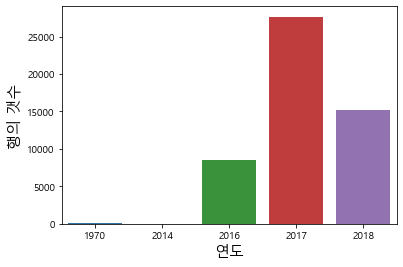

In [13]:
# seaborn을 활용하여 x축에 '연'을 넣고 막대그래프로 시각화합니다. 
# x축을 연도, y축을 행의 갯수로 지정
x = df.groupby('연').count().index
y = df.groupby('연')['연'].count()
y
sns.barplot(data=df, x= x, y=y)
plt.xlabel('연도', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

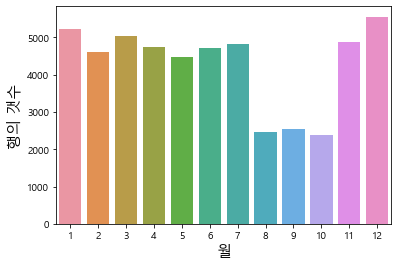

In [14]:
# seaborn을 활용하여 x축에 '월'을 넣고 막대그래프로 시각화합니다. 
# x축을 월, y축을 행의 갯수로 지정
x = df.groupby('월').count().index
y = df.groupby('월')['월'].count()
y
sns.barplot(data=df, x= x, y=y)
plt.xlabel('월', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

In [15]:
# 데이터를 연, 월의 오름차순으로 정렬합니다.

sorted_df = df.sort_values(by = ['연', '월'], ascending=[True, True], na_position="first")
sorted_df

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소,연,월,연월,시,분,요일
312,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,31,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1970-01,9,0,3
371,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,46,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1970-01,9,0,3
398,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,27,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1970-01,9,0,3
408,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,37,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1970-01,9,0,3
409,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,38,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1970-01,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51365,시민건강국,카드,NaN,박*수 주무관 등 10명,보건의료정책과,31,50000.0,시민건강국 현안업무 추진직원 격려 다과구입비 지급,2018-12-28 15:08:00,공차(중구 을지로1길),2018,12,2018-12,15,8,4
51366,시민건강국,카드,NaN,양*수 주무관 등 8명,보건의료정책과,32,150000.0,업무유관기관 근무자 격려 다과구입비 지급,2018-12-28 15:03:00,미스터피자(중구 무교동1),2018,12,2018-12,15,3,4
51367,시민건강국,카드,NaN,시민건강국장 등 10명,보건의료정책과,33,173920.0,보충형 공보험 제도 검토회의 추진관련 다과 구입비 지급,2018-12-28 09:56:00,마마스(중구 무교동19),2018,12,2018-12,9,56,4
51368,시민건강국,카드,NaN,보건의료정책과장 등 10명,보건의료정책과,34,186000.0,2018년 예산사업 추진관련 유관부서 간담회비 지급,2018-12-28 18:01:00,하대포(중구 을지로3길),2018,12,2018-12,18,1,4


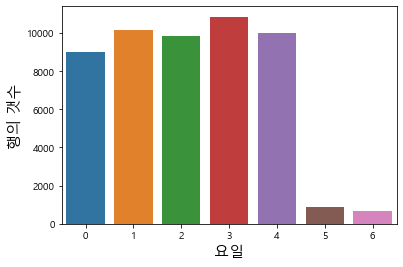

In [16]:
# seaborn을 활용하여 x축에 '요일'을 넣고 막대그래프로 시각화합니다. 
# x축을 0~6(월요일~일요일), y축을 행의 갯수로 설정
x = df.groupby('요일').count().index
y = df.groupby('요일')['요일'].count()

sns.barplot(data=df, x= x, y=y)
plt.xlabel('요일', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

In [17]:
# 아래와 같이 요일을 한글로 바꿔 '요일_한글'이라는 파생변수를 만들어 df에 저장합니다.
# 0 => 월, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일
week = { 0: '월', 1: '화', 2: '수', 3:'목', 4:'금', 5:'토', 6:'일'}
#0~6으로 저장된 요일을 딕셔너리에 대응시켜 월~일로 변경 후 요일_한글 컬럼에 저장
df['요일_한글'] = df['집행일시'].dt.dayofweek.map(week)

df

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소,연,월,연월,시,분,요일,요일_한글
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,2018-01,20,41,4,금
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,2018-01,19,6,1,화
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,2018-01,20,13,0,월
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-01,9,9,4,금
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-01,9,10,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길),2016,12,2016-12,13,23,3,목
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82),2016,12,2016-12,21,19,3,목
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84),2016,12,2016-12,13,4,4,금
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13:00,스타벅스 (중구 을지로 19),2016,12,2016-12,13,13,4,금


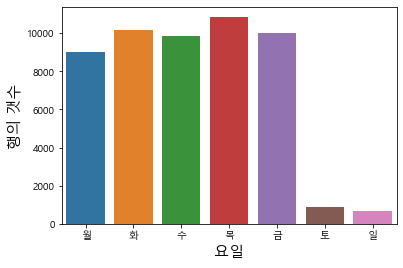

In [18]:
# seaborn을 활용하여 x축에 한글로 변경된 '요일'을 넣고 막대그래프로 시각화합니다. 

week_list = ['월', '화', '수', '목', '금', '토', '일']
x = df.groupby('요일_한글').count().index
y = df.groupby('요일_한글')['요일_한글'].count()

sns.barplot(data=df, x= x, y=y, order=week_list)
plt.xlabel('요일', fontsize=15)
plt.ylabel('행의 갯수', fontsize=15)
plt.show()

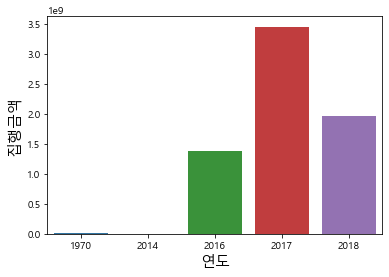

In [19]:
# seaborn을 활용하여 x축에 '연'을 넣고 y축에 '집행금액'을 넣어 막대그래프로 시각화합니다. 

x = df.groupby('연').count().index
y = df.groupby('연').sum()['집행금액']
y
sns.barplot(data=df, x= x, y=y)
plt.xlabel('연도', fontsize=15)
plt.ylabel('집행금액', fontsize=15)
plt.show()

In [20]:
# 집행목적이 누락값인 데이터를 확인합니다.

df[df['집행목적'].isnull() == True]

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소,연,월,연월,시,분,요일,요일_한글
3403,대변인,카드,NaN,행정팀장 등 4명,대변인 언론담당관,112,75000.0,NaN,2017-09-28 19:07:00,남산집 (중구 무교동),2017,9,2017-09,19,7,3,목
14256,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,1,30000.0,NaN,2017-02-01 12:03:00,복성각 (서울 중구 덕수궁길 7),2017,2,2017-02,12,3,2,수
14257,여성가족정책실,카드,NaN,가족정책팀장외 3명,여성가족정책실 가족담당관,2,21500.0,NaN,2017-02-01 15:30:00,마포만두 (서울 중구 남대문로9길 51),2017,2,2017-02,15,30,2,수
14258,여성가족정책실,카드,NaN,가족담당관외 5명,여성가족정책실 가족담당관,3,56500.0,NaN,2017-02-10 09:48:00,파스쿠찌종각알파빌딩 (서울 종로구 종로),2017,2,2017-02,9,48,4,금
14259,여성가족정책실,카드,NaN,가족담당관외 6명,여성가족정책실 가족담당관,4,8000.0,NaN,2017-02-10 09:54:00,파리바게뜨 종로시그 (서울 종로구 종로),2017,2,2017-02,9,54,4,금
14260,여성가족정책실,카드,NaN,가족담당관외 8명,여성가족정책실 가족담당관,5,117000.0,NaN,2017-02-10 12:14:00,（주）뚜리삼 (서울 중구 무교동),2017,2,2017-02,12,14,4,금
14261,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,6,87500.0,NaN,2017-02-14 12:55:00,동성각 (서울 종로구 새문안로9길 29-2),2017,2,2017-02,12,55,1,화
14262,여성가족정책실,카드,NaN,가족담당관외 20명,여성가족정책실 가족담당관,7,62000.0,NaN,2017-02-21 19:37:00,갯마을낙지 (서울 중구 을지로1길 32),2017,2,2017-02,19,37,1,화
14263,여성가족정책실,카드,NaN,아동복지권리팀장외 3명,여성가족정책실 가족담당관,8,70000.0,NaN,2017-02-22 16:55:00,행복한하루소바 (서울 중구 무교로),2017,2,2017-02,16,55,2,수
14264,여성가족정책실,카드,NaN,가족정책팀장외 5명,여성가족정책실 가족담당관,9,125000.0,NaN,2017-02-22 21:36:00,신촌서서갈비（북창본 (서울 중구 세종대로12길 25),2017,2,2017-02,21,36,2,수


In [21]:
# 집행목적이 누락값인 데이터가 존재하므로 누락값을 공백으로 채워줍니다.

df[df['집행목적'].isnull() == True] = ""

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
df[df['집행목적'].isnull() == True]

,1소속부서,결제방법,구분,대상인원,부서명,연번,집행금액,집행목적,집행일시,집행장소,연,월,연월,시,분,요일,요일_한글


In [23]:
# 집행목적에 있는 키워드를 통해 워드 클라우드를 만듭니다.
# 집행목적의 값의 갯수를 세고 워드클라우드로 활용하기 위해 딕셔너리로 변환
dict_text = df['집행목적'].value_counts().to_dict()
dict_text

{'현안업무 추진직원 격려 간담회 개최비용 지급': 692,
 '시정 운영 관련 유관부서 업무협의 간담회': 237,
 '시정 홍보 강화를 위한 언론기관 간담회': 158,
 '경조금 지급': 144,
 '시정 운영 관련 유관기관 의견수렴 간담회': 140,
 '사회혁신 의제 발굴 논의 간담회': 129,
 '시정현안 관련 국회 등 유관기관 업무협의 간담회': 125,
 '시정 현안관련 유관기관 간담회': 120,
 '시정 정책 추진 자문 간담회': 110,
 '시정 현안관련 유관부서 간담회': 108,
 '소속 상근직원 경조사비 지급': 99,
 '시정 홍보 강화를 위한 의회 등 유관기관 간담회': 96,
 '시정 현안 관련 유관부서 업무협의 간담회': 88,
 '현안업무 추진 직원 격려 간담회 개최 비용 지급': 86,
 '시정 홍보 강화를 위한 국회 등 유관기관 간담회': 85,
 '시정 정책 현안 관련 업무협의': 85,
 '내방객 접대용 다과구매(기획관)': 83,
 '시정 현안 관련 언론기관 의견수렴 간담회': 82,
 '서울혁신파크 활성화 방안 논의 간담회': 81,
 '정무부시장실 직원 간담회 개최': 80,
 '현안 업무추진관련 간담회 개최 비용 지급': 75,
 '시정 현안 관련 유관기관 업무협의 간담회': 72,
 '시정 현안 관련 유관기관 의견수렴 간담회': 72,
 '시정 운영 관련 전문가 자문 간담회': 70,
 '시정 일정 및 의전 관련 업무협의': 68,
 '현안 업무 추진 직원 격려 간담회': 67,
 '현안업무 추진 직원 격려 간담회': 66,
 '공유서울 발전방안 논의 간담회': 61,
 '당번 노고 격려 간담회': 60,
 '시정 일정 관련 업무협의': 59,
 '시정 홍보 강화를 위한 언론기관 등 시정설명 간담회': 58,
 '시정 운영 관련 관계자 의견수렴 간담회': 58,
 '시정 현안관련 의회 등 유관기관 간담회': 57,
 '현안업무 담당자 격려': 56,
 '시정 운영 관련 유관기관 업무협의 간담회': 56,
 '

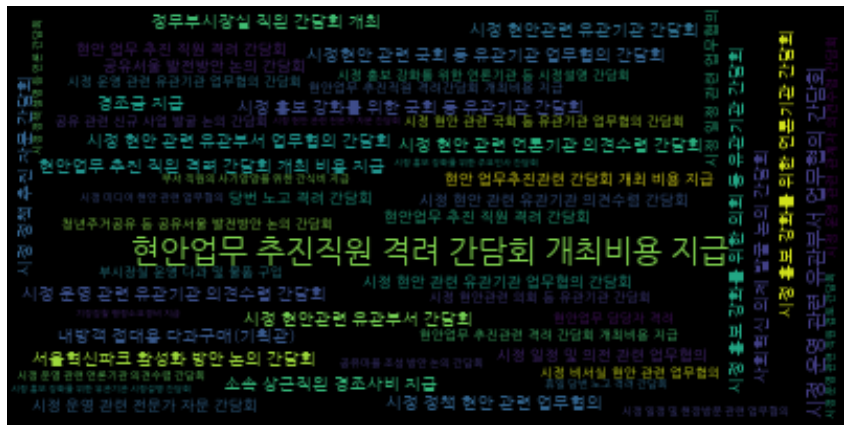

In [24]:
# 빈도수만큼 크기 변화를 주고 워드클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic').generate_from_frequencies(dict_text)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()